# Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from matplotlib import pyplot as plt

## Reading the dataset

In [2]:
data_train = pd.read_csv('dataset/train.csv', nrows=20000000)
data_train.shape

(20000000, 8)

In [3]:
data_train.head()

,key,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2009-06-15 17:26:21.0000001,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,2010-01-05 16:52:16.0000002,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,2011-08-18 00:35:00.00000049,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,2012-04-21 04:30:42.0000001,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,2010-03-09 07:51:00.000000135,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1


In [4]:
data_train.describe()

,fare_amount,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,2.000000e+07,2.000000e+07,2.000000e+07,1.999986e+07,1.999986e+07,2.000000e+07
mean,1.134298e+01,-7.251140e+01,3.992070e+01,-7.251060e+01,3.991950e+01,1.685312e+00
std,1.689916e+01,1.298955e+01,9.388927e+00,1.290617e+01,9.570037e+00,1.321177e+00
min,-1.077500e+02,-3.439245e+03,-3.492264e+03,-3.442025e+03,-3.493652e+03,0.000000e+00
25%,6.000000e+00,-7.399207e+01,4.073491e+01,-7.399140e+01,4.073403e+01,1.000000e+00
50%,8.500000e+00,-7.398181e+01,4.075263e+01,-7.398016e+01,4.075315e+01,1.000000e+00
75%,1.250000e+01,-7.396709e+01,4.076712e+01,-7.396368e+01,4.076809e+01,2.000000e+00
max,6.155086e+04,3.457626e+03,3.406008e+03,3.457622e+03,3.400392e+03,2.080000e+02


In [5]:
data_train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [6]:
data_test = pd.read_csv("dataset/test.csv")
data_test.head()

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24 UTC,-73.973320,40.763805,-73.981430,40.743835,1
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24 UTC,-73.986862,40.719383,-73.998886,40.739201,1
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44 UTC,-73.982524,40.751260,-73.979654,40.746139,1
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12 UTC,-73.981160,40.767807,-73.990448,40.751635,1
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12 UTC,-73.966046,40.789775,-73.988565,40.744427,1


In [7]:
data_test.shape

(9914, 7)

In [8]:
data_test.describe()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
count,9914.000000,9914.000000,9914.000000,9914.000000,9914.000000
mean,-73.974722,40.751041,-73.973657,40.751743,1.671273
std,0.042774,0.033541,0.039072,0.035435,1.278747
min,-74.252193,40.573143,-74.263242,40.568973,1.000000
25%,-73.992501,40.736125,-73.991247,40.735254,1.000000
50%,-73.982326,40.753051,-73.980015,40.754065,1.000000
75%,-73.968013,40.767113,-73.964059,40.768757,2.000000
max,-72.986532,41.709555,-72.990963,41.696683,6.000000


In [9]:
data_train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

## Data Exploration

**Train Data**

In [10]:
data_train.isnull().sum()

key                    0
fare_amount            0
pickup_datetime        0
pickup_longitude       0
pickup_latitude        0
dropoff_longitude    139
dropoff_latitude     139
passenger_count        0
dtype: int64

#### Test Data

In [11]:
data_test.isnull().sum()

key                  0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

### Dealing with target variable

#### check the target column

In [12]:
data_train['fare_amount'].describe()

count    2.000000e+07
mean     1.134298e+01
std      1.689916e+01
min     -1.077500e+02
25%      6.000000e+00
50%      8.500000e+00
75%      1.250000e+01
max      6.155086e+04
Name: fare_amount, dtype: float64

#### Dealing with the negative fair value

Fare amount has a negative value, which doesn't make sense. Remove these fields

In [13]:
from collections import Counter
Counter(data_train['fare_amount'] < 0)

Counter({False: 19999168, True: 832})

In [14]:
Counter(data_train['passenger_count'] > 6)

Counter({False: 19999969, True: 31})

#### Removing the above and below specific ranges of the Latitudes and Longitudes ranges

* **Latitudes range from 35 to 45.**
* **Longitudes range from -80 to -70.**

In [15]:
def clean_df(df):
    return df[(df.fare_amount > 0) & 
            (df.pickup_longitude > -80) & (df.pickup_longitude < -70) &
            (df.pickup_latitude > 35) & (df.pickup_latitude < 45) &
            (df.dropoff_longitude > -80) & (df.dropoff_longitude < -70) &
            (df.dropoff_latitude > 35) & (df.dropoff_latitude < 45) &
            (df.passenger_count > 0) & (df.passenger_count < 10)]

data_train = clean_df(data_train)
print(len(data_train))

19514406


In [16]:
data_train.isnull().sum()

key                  0
fare_amount          0
pickup_datetime      0
pickup_longitude     0
pickup_latitude      0
dropoff_longitude    0
dropoff_latitude     0
passenger_count      0
dtype: int64

In [17]:
data_train.shape

(19514406, 8)

## Cleaning the dataset

In [18]:
#Performing similar operations for longitude
data_train['pickup_longitude'].describe()

count    1.951441e+07
mean    -7.397526e+01
std      4.398766e-02
min     -7.993917e+01
25%     -7.399228e+01
50%     -7.398210e+01
75%     -7.396831e+01
max     -7.000039e+01
Name: pickup_longitude, dtype: float64

In [19]:
data_train.dtypes

key                   object
fare_amount          float64
pickup_datetime       object
pickup_longitude     float64
pickup_latitude      float64
dropoff_longitude    float64
dropoff_latitude     float64
passenger_count        int64
dtype: object

In [20]:
data_train = data_train.drop(columns = ["key"])

In [21]:
data_train

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count
0,4.5,2009-06-15 17:26:21 UTC,-73.844311,40.721319,-73.841610,40.712278,1
1,16.9,2010-01-05 16:52:16 UTC,-74.016048,40.711303,-73.979268,40.782004,1
2,5.7,2011-08-18 00:35:00 UTC,-73.982738,40.761270,-73.991242,40.750562,2
3,7.7,2012-04-21 04:30:42 UTC,-73.987130,40.733143,-73.991567,40.758092,1
4,5.3,2010-03-09 07:51:00 UTC,-73.968095,40.768008,-73.956655,40.783762,1
...,...,...,...,...,...,...,...
19999995,9.5,2013-10-16 17:49:00 UTC,-73.977708,40.776922,-73.966862,40.772447,5
19999996,3.5,2014-08-08 00:16:56 UTC,-73.963245,40.766756,-73.965499,40.763579,1
19999997,4.9,2009-10-10 22:14:00 UTC,-73.970945,40.794278,-73.961380,40.801378,1
19999998,5.5,2014-12-10 12:26:00 UTC,-73.968077,40.799802,-73.961062,40.811672,6


We can calulate the distance in a sphere when latitudes and longitudes are given by Haversine formula

haversine(θ) = sin²(θ/2)

Eventually, the formual boils down to the following where φ is latitude, λ is longitude, R is earth’s radius (mean radius = 6,371km) to include latitude and longitude coordinates (A and B in this case).

a = sin²((φB - φA)/2) + cos φA . cos φB . sin²((λB - λA)/2)

c = 2 * atan2( √a, √(1−a) )

d = R ⋅ c

d = Haversine distance

In [22]:
def haversine_dist(latPick, lonPick,latDrop, lonDrop):
    """
    Return distance along great radius between pickup and dropoff coordinates.
    """
    #Define earth radius (km)
    R_earth = 6371
    #Convert degrees to radians
    latPick, lonPick,latDrop, lonDrop = map(np.radians,[latPick, lonPick,latDrop, lonDrop])
    #Compute distances along lat, lon dimensions
    data_lat = latDrop - latPick
    data_lon = lonDrop - lonPick
    
    #Compute haversine distance
    a = np.sin(data_lat/2.0)**2 + np.cos(latPick) * np.cos(latDrop) * np.sin(data_lon/2.0)**2
    
    return 2 * R_earth * np.arcsin(np.sqrt(a))

def add_airport_dist(dataset):
    """
    Return minumum distance from pickup or dropoff coordinates to each airport.
    JFK: John F. Kennedy International Airport
    EWR: Newark Liberty International Airport
    LGA: LaGuardia Airport
    """
    
    JFKCoord = (40.639722, -73.778889)
    EWRCoord = (40.6925, -74.168611)
    LGACoord = (40.77725, -73.872611)
    
    latPick = dataset['pickup_latitude']
    latDrop = dataset['dropoff_latitude']
    lonPick = dataset['pickup_longitude']
    lonDrop = dataset['dropoff_longitude']
    
    lgaPick= haversine_dist(latPick, lonPick, LGACoord[0], LGACoord[1]) 
    lgaDrop = haversine_dist(LGACoord[0], LGACoord[1], latDrop, lonDrop) 
    jfkPick = haversine_dist(latPick, lonPick, JFKCoord[0], JFKCoord[1]) 
    jfkDrop = haversine_dist(JFKCoord[0],JFKCoord[1], latDrop, lonDrop) 
    ewrPick = haversine_dist(latPick, lonPick,  EWRCoord[0],  EWRCoord[1])
    ewrDrop = haversine_dist( EWRCoord[0],  EWRCoord[1], latDrop, lonDrop) 
   
    dataset['jfk_dist'] = pd.concat([jfkPick,jfkDrop], axis=1).min(axis=1)
    dataset['ewr_dist'] = pd.concat([ewrPick, ewrDrop], axis=1).min(axis=1)
    dataset['lga_dist'] = pd.concat([lgaPick, lgaDrop], axis=1).min(axis=1)
    
    return dataset
    
def add_datetime_info(dataset):
    #Convert to datetime format
    dataset['pickup_datetime'] = pd.to_datetime(dataset['pickup_datetime'],format="%Y-%m-%d %H:%M:%S UTC")
    
    dataset['hour'] = dataset.pickup_datetime.dt.hour
    dataset['day'] = dataset.pickup_datetime.dt.day
    dataset['month'] = dataset.pickup_datetime.dt.month
    dataset['weekday'] = dataset.pickup_datetime.dt.weekday
    dataset['year'] = dataset.pickup_datetime.dt.year
    
    return dataset

In [23]:
data_train = add_datetime_info(data_train)

In [24]:
data_train = add_airport_dist(data_train)

In [25]:
data_train['distance'] = haversine_dist(data_train['pickup_latitude'], data_train['pickup_longitude'], data_train['dropoff_latitude'] , data_train['dropoff_longitude'])

**Test Data**

In [26]:
data_test = pd.read_csv("dataset/test.csv")


In [27]:
data_test = add_datetime_info(data_test)
data_test = add_airport_dist(data_test)

In [28]:
data_test['distance'] = haversine_dist(data_test['pickup_latitude'], data_test['pickup_longitude'], data_test['dropoff_latitude'] , data_test['dropoff_longitude'])

In [29]:
data_train

,fare_amount,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,distance
0,4.5,2009-06-15 17:26:21,-73.844311,40.721319,-73.841610,40.712278,1,17,15,6,0,2009,9.647141,27.523051,6.660494,1.030764
1,16.9,2010-01-05 16:52:16,-74.016048,40.711303,-73.979268,40.782004,1,16,5,1,1,2010,21.525635,13.029641,8.996046,8.450134
2,5.7,2011-08-18 00:35:00,-73.982738,40.761270,-73.991242,40.750562,2,0,18,8,3,2011,21.735040,16.282199,9.442812,1.389525
3,7.7,2012-04-21 04:30:42,-73.987130,40.733143,-73.991567,40.758092,1,4,21,4,5,2012,20.401167,15.949684,10.241872,2.799270
4,5.3,2010-03-09 07:51:00,-73.968095,40.768008,-73.956655,40.783762,1,7,9,3,1,2010,21.397709,18.867107,7.113348,1.999157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19999995,9.5,2013-10-16 17:49:00,-73.977708,40.776922,-73.966862,40.772447,5,17,16,10,2,2013,21.653319,18.623749,7.954439,1.040057
19999996,3.5,2014-08-08 00:16:56,-73.963245,40.766756,-73.965499,40.763579,1,0,8,8,4,2014,20.907850,18.852044,7.720929,0.401038
19999997,4.9,2009-10-10 22:14:00,-73.970945,40.794278,-73.961380,40.801378,1,22,10,10,5,2009,23.608252,20.134177,7.940239,1.127631
19999998,5.5,2014-12-10 12:26:00,-73.968077,40.799802,-73.961062,40.811672,6,12,10,12,2,2014,23.896690,20.682046,8.372068,1.445925


In [30]:
data_test

,key,pickup_datetime,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,distance
0,2015-01-27 13:08:24.0000002,2015-01-27 13:08:24,-73.973320,40.763805,-73.981430,40.743835,1,13,27,1,1,2015,20.630787,16.776178,8.611599,2.323260
1,2015-01-27 13:08:24.0000003,2015-01-27 13:08:24,-73.986862,40.719383,-73.998886,40.739201,1,13,27,1,1,2015,19.647702,15.217920,11.446400,2.425353
2,2011-10-08 11:53:44.0000002,2011-10-08 11:53:44,-73.982524,40.751260,-73.979654,40.746139,1,11,8,10,5,2011,20.652459,16.988793,9.656367,0.618628
3,2012-12-01 21:12:12.0000002,2012-12-01 21:12:12,-73.981160,40.767807,-73.990448,40.751635,1,21,1,12,5,2012,21.747868,16.391035,9.200895,1.961033
4,2012-12-01 21:12:12.0000003,2012-12-01 21:12:12,-73.966046,40.789775,-73.988565,40.744427,1,21,1,12,5,2012,21.167442,16.235246,7.989082,5.387301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,2015-05-10 12:37:51.0000002,2015-05-10 12:37:51,-73.968124,40.796997,-73.955643,40.780388,6,12,10,5,6,2015,21.601099,20.432229,7.000042,2.124874
9910,2015-01-12 17:05:51.0000001,2015-01-12 17:05:51,-73.945511,40.803600,-73.960213,40.776371,6,17,12,1,0,2015,21.551667,19.882008,6.800716,3.270969
9911,2015-04-19 20:44:15.0000001,2015-04-19 20:44:15,-73.991600,40.726608,-73.789742,40.647011,6,20,19,4,6,2015,1.222822,15.394506,11.496543,19.183941
9912,2015-01-31 01:05:19.0000005,2015-01-31 01:05:19,-73.985573,40.735432,-73.939178,40.801731,6,1,31,1,5,2015,20.419491,16.148732,6.230296,8.343486


In [31]:
data_train = data_train.drop(columns = ["pickup_datetime"])
data_test = data_test.drop(columns = ["key","pickup_datetime"])

# Exploratory Data Analysis

**Does Month affects the Fare Amount?**

<AxesSubplot:xlabel='month', ylabel='count'>

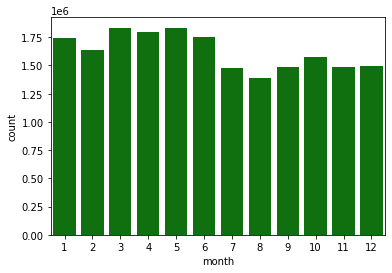

In [32]:
sns.countplot(x = data_train["month"],color='green')

Text(0, 0.5, 'Fare')

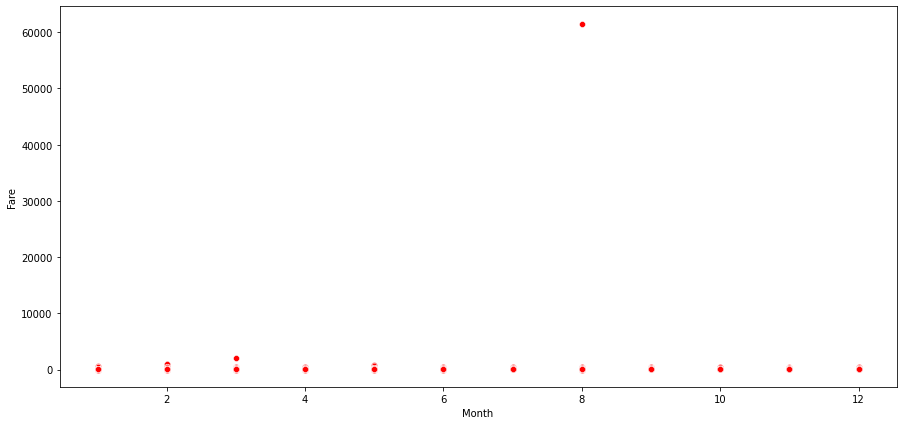

In [33]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = data_train["month"], y = data_train["fare_amount"],color='red')
plt.xlabel('Month')
plt.ylabel('Fare')

In [34]:
data_train = data_train.drop(data_train[data_train.fare_amount > 500].index)

Text(0, 0.5, 'Fare')

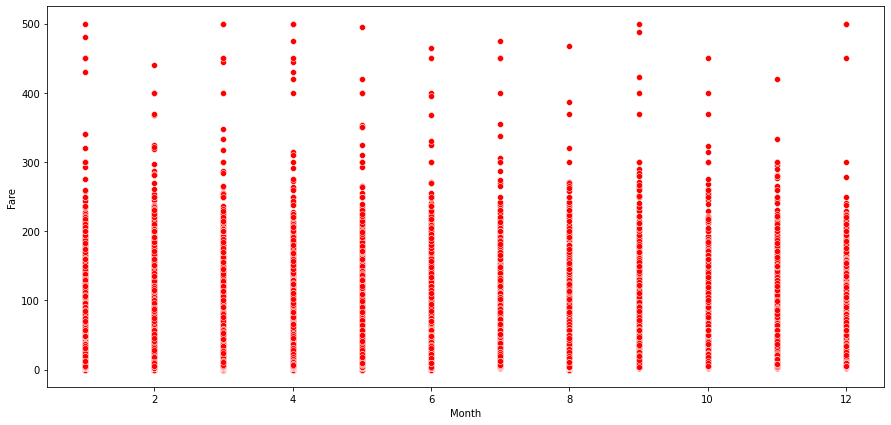

In [35]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = data_train["month"], y = data_train["fare_amount"],color='red')
plt.xlabel('Month')
plt.ylabel('Fare')

**Does Fare Amount Changed with Year?**

<AxesSubplot:xlabel='year', ylabel='count'>

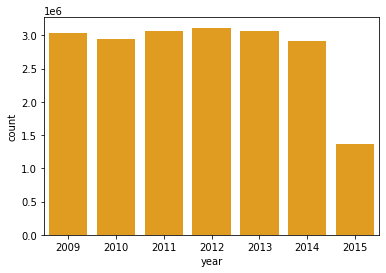

In [36]:
sns.countplot(x = data_train["year"],color='orange')

Text(0, 0.5, 'Fare')

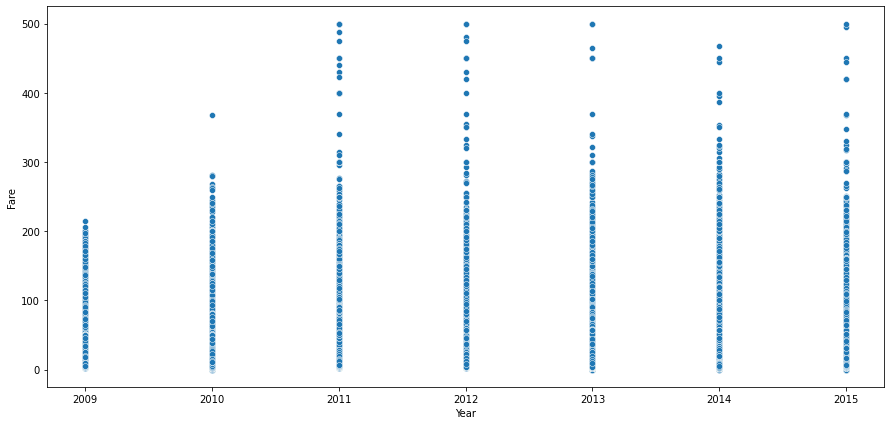

In [37]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = data_train["year"], y = data_train["fare_amount"])
plt.xlabel('Year')
plt.ylabel('Fare')

**Does Weekday affects the Fare Amount?**

<AxesSubplot:xlabel='weekday', ylabel='count'>

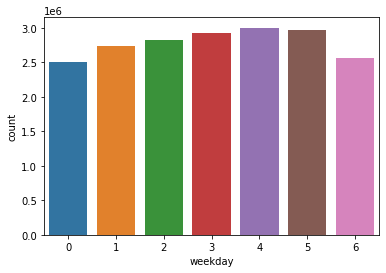

In [38]:
sns.countplot(x = data_train["weekday"])

Text(0, 0.5, 'Fare')

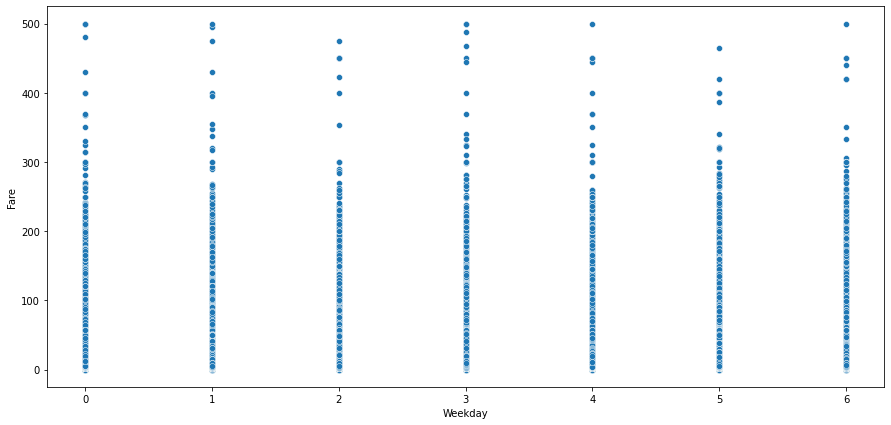

In [39]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = data_train["weekday"], y = data_train["fare_amount"])
plt.xlabel('Weekday')
plt.ylabel('Fare')

**Does Hour affects the Fare Amount?**

<AxesSubplot:xlabel='hour', ylabel='count'>

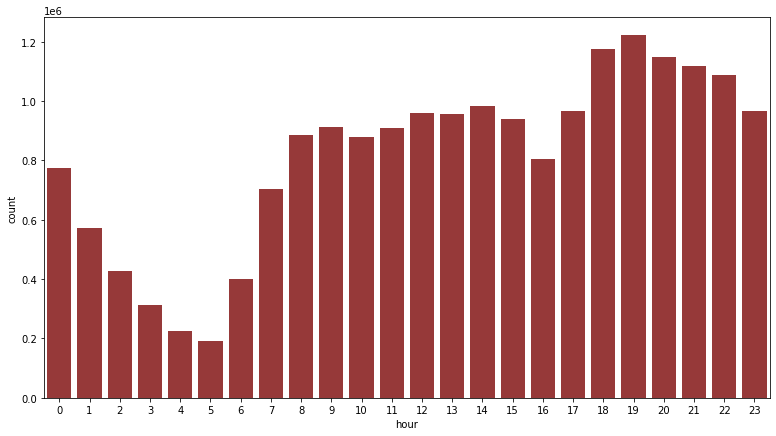

In [40]:
plt.figure(figsize=(13, 7))
sns.countplot(x = data_train["hour"],color='brown')

Definetely! Frequency of Cabs is lowest at 5 AM and highest at 6 PM.

Text(0, 0.5, 'Fare')

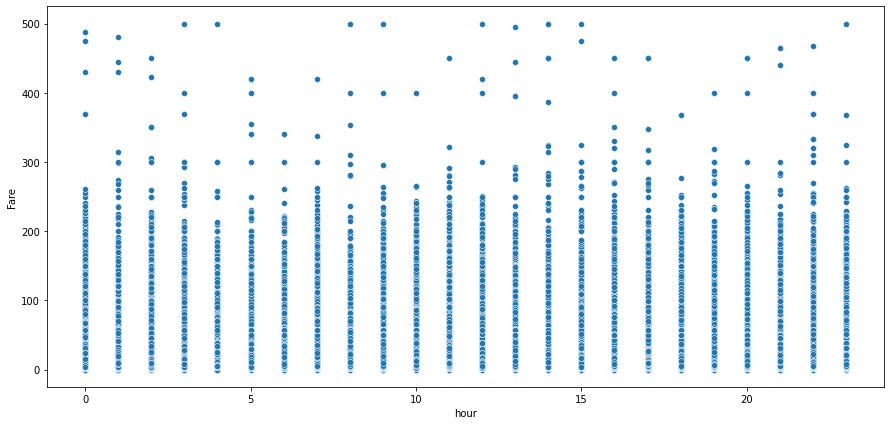

In [41]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = data_train["hour"], y = data_train["fare_amount"])
plt.xlabel('hour')
plt.ylabel('Fare')

**Does number of Passengers affects the Fare Amount?**

<AxesSubplot:xlabel='passenger_count', ylabel='count'>

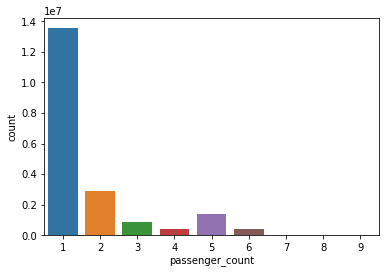

In [42]:
sns.countplot(x = data_train["passenger_count"])

Text(0, 0.5, 'Fare')

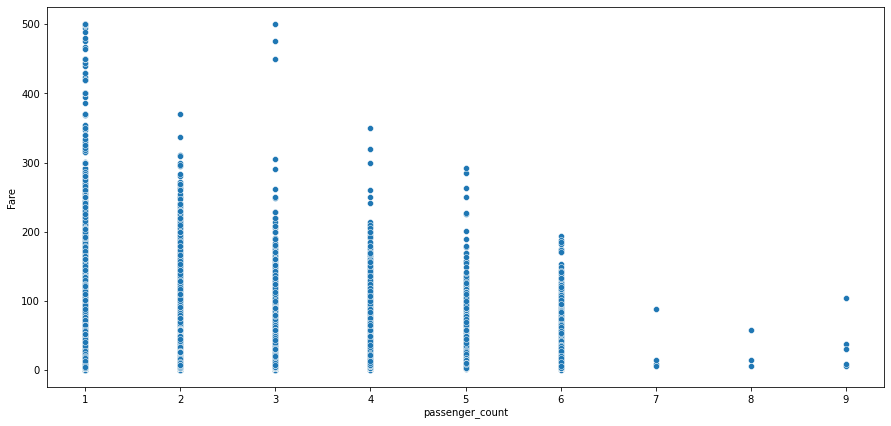

In [43]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = data_train["passenger_count"], y = data_train["fare_amount"])
plt.xlabel('passenger_count')
plt.ylabel('Fare')

In [44]:
data_train = data_train.drop(data_train[data_train.passenger_count > 6].index)

Text(0, 0.5, 'Fare')

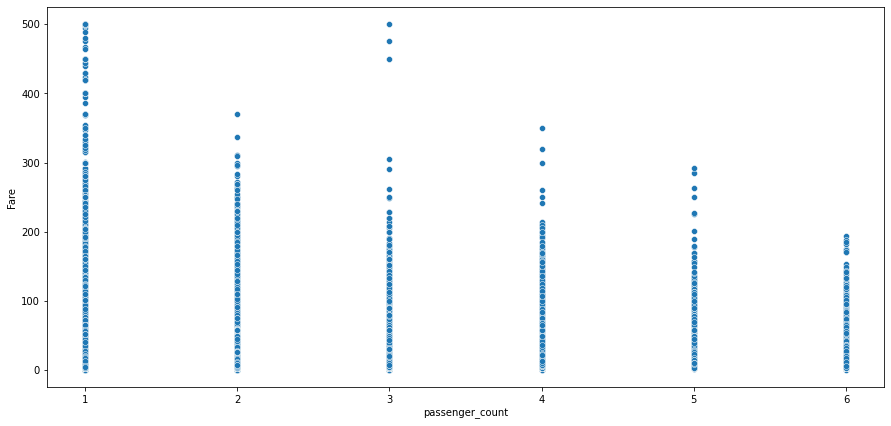

In [45]:
plt.figure(figsize=(15,7))
sns.scatterplot(x = data_train["passenger_count"], y = data_train["fare_amount"])
plt.xlabel('passenger_count')
plt.ylabel('Fare')

**Does the distance between the pickup and dropoff point affects the Fare Amount?**

I am confident that the distance would affect the fare a great deal. Lets visualise it.

Firstly check the frequency of the distnaces that we calculated using Harevrsine Formula. I will do so by creating bins (0-10 Kms, 10-20 Kms, and so on.)

In [46]:
bins_0 = data_train.loc[(data_train['distance'] == 0), ['distance']]
bins_1 = data_train.loc[(data_train['distance'] > 0) & (data_train['distance'] <= 10),['distance']]
bins_2 = data_train.loc[(data_train['distance'] > 10) & (data_train['distance'] <= 50),['distance']]
bins_3 = data_train.loc[(data_train['distance'] > 50) & (data_train['distance'] <= 100),['distance']]
bins_4 = data_train.loc[(data_train['distance'] > 100) & (data_train['distance'] <= 200),['distance']]
bins_5 = data_train.loc[(data_train['distance'] > 300),['distance']]
bins_6 = data_train.loc[(data_train['distance'] > 300),['distance']]
bins_0['bins'] = '0'
bins_1['bins'] = '0-10'
bins_2['bins'] = '11-50'
bins_3['bins'] = '51-100'
bins_4['bins'] = '100-200'
bins_5['bins'] = '201-300'
bins_6['bins'] = '>300'
dist_bins = pd.concat([bins_0,bins_1,bins_2,bins_3,bins_4,bins_5,bins_6])
#len(dist_bins)
dist_bins.columns

Index(['distance', 'bins'], dtype='object')

Text(0, 0.5, 'Frequency')

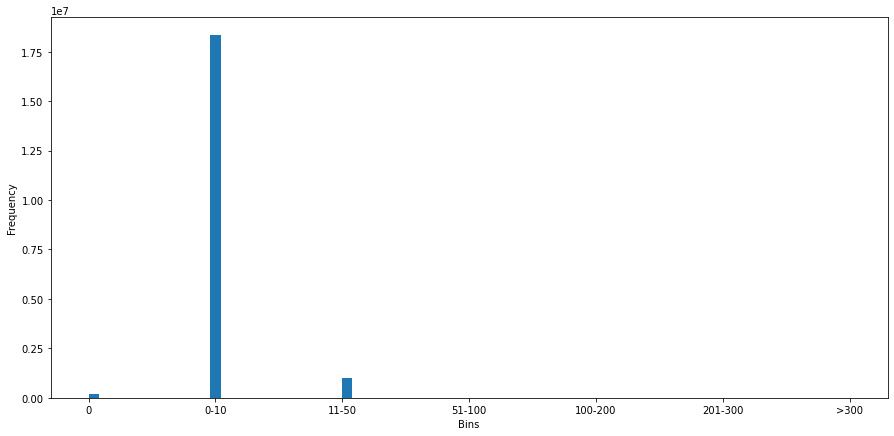

In [47]:
plt.figure(figsize = (15, 7))
plt.hist(dist_bins['bins'], bins = 75)
plt.xlabel('Bins')
plt.ylabel('Frequency')

<AxesSubplot:>

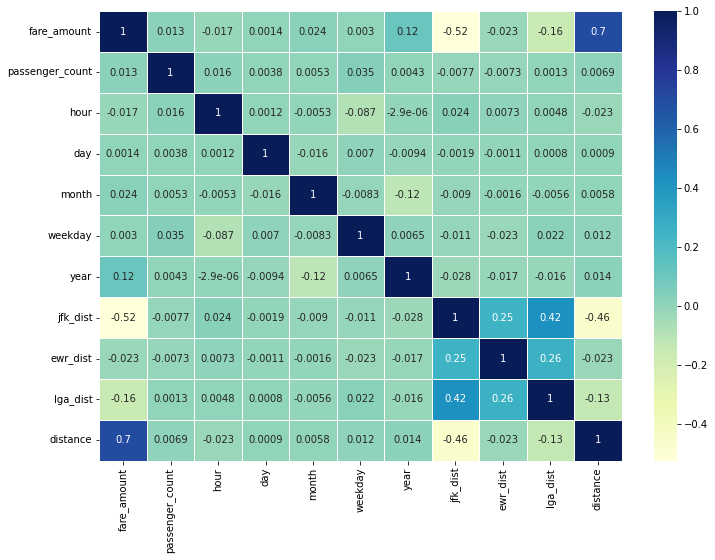

In [48]:
fig, ax = plt.subplots()
fig.set_size_inches(11.7, 8.27)
sns.heatmap(data_train.drop(['pickup_longitude','pickup_latitude','dropoff_longitude','dropoff_latitude'],axis=1).corr(),cmap='YlGnBu',linewidths=.5,annot=True)

In [49]:
data_train['distance'].describe()

count    1.951439e+07
mean     3.358965e+00
std      4.427483e+00
min      0.000000e+00
25%      1.253415e+00
50%      2.153463e+00
75%      3.912064e+00
max      7.914602e+02
Name: distance, dtype: float64

In [50]:
data_train.shape

(19514386, 15)

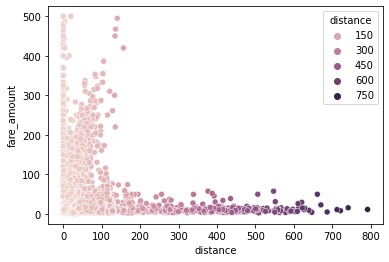

In [51]:
# skipping the distance less than 1 km
except_zero = data_train[data_train.distance != 0]
sns.scatterplot(y = 'fare_amount',x = 'distance',data=except_zero,hue='distance')
plt.show()

## Box plot for fare amount

C:\Users\Norman\.virtualenvs\NLP-nCmKYvRh\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='fare_amount'>

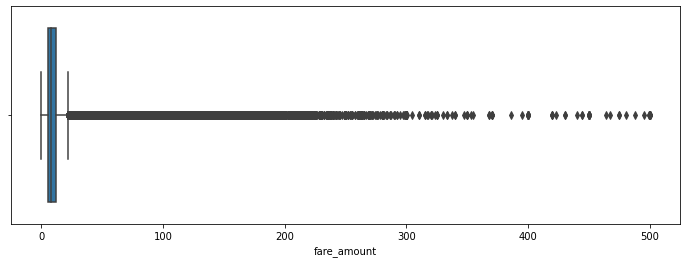

In [52]:
import seaborn as sns
plt.figure(figsize=(12,4))
sns.boxplot(data_train['fare_amount'])

## Scatter plot for Distance and fare amount

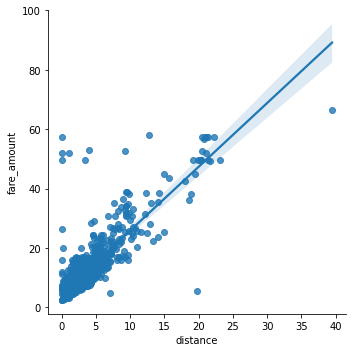

In [53]:
sns.lmplot(x='distance', y='fare_amount', data=data_train[1:1000])

In [54]:
Counter(dist_bins['bins'])

Counter({'0': 207934,
         '0-10': 18320666,
         '11-50': 978176,
         '51-100': 3002,
         '100-200': 4322,
         '201-300': 198,
         '>300': 198})

In [55]:
data_train[(data_train['distance'] == 0)]['fare_amount'].describe()

count    207934.000000
mean         11.075182
std          14.759449
min           0.010000
25%           4.900000
50%           6.900000
75%          10.500000
max         500.000000
Name: fare_amount, dtype: float64

# Modeling and Prediction

## Data splitting

In [56]:
x_train = data_train.iloc[:, data_train.columns != 'fare_amount']
kaggle_test = data_test.iloc[:, data_test.columns != 'fare_amount']
y_train = data_train['fare_amount'].values

In [57]:
kaggle_test

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,distance
0,-73.973320,40.763805,-73.981430,40.743835,1,13,27,1,1,2015,20.630787,16.776178,8.611599,2.323260
1,-73.986862,40.719383,-73.998886,40.739201,1,13,27,1,1,2015,19.647702,15.217920,11.446400,2.425353
2,-73.982524,40.751260,-73.979654,40.746139,1,11,8,10,5,2011,20.652459,16.988793,9.656367,0.618628
3,-73.981160,40.767807,-73.990448,40.751635,1,21,1,12,5,2012,21.747868,16.391035,9.200895,1.961033
4,-73.966046,40.789775,-73.988565,40.744427,1,21,1,12,5,2012,21.167442,16.235246,7.989082,5.387301
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9909,-73.968124,40.796997,-73.955643,40.780388,6,12,10,5,6,2015,21.601099,20.432229,7.000042,2.124874
9910,-73.945511,40.803600,-73.960213,40.776371,6,17,12,1,0,2015,21.551667,19.882008,6.800716,3.270969
9911,-73.991600,40.726608,-73.789742,40.647011,6,20,19,4,6,2015,1.222822,15.394506,11.496543,19.183941
9912,-73.985573,40.735432,-73.939178,40.801731,6,1,31,1,5,2015,20.419491,16.148732,6.230296,8.343486


In [58]:
X_train, X_test, y_train, y_test = train_test_split(x_train,y_train,test_size=0.20, random_state=42)


In [59]:
X_train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,hour,day,month,weekday,year,jfk_dist,ewr_dist,lga_dist,distance
6329924,-74.001010,40.757339,-73.984841,40.760061,3,19,29,3,0,2010,21.920068,15.857380,9.642635,1.395085
16368607,-73.997993,40.756351,-73.977173,40.750771,2,8,4,2,2,2015,20.782692,16.035377,9.285355,1.860336
6401658,-73.994085,40.728625,-74.008417,40.749253,3,15,4,10,5,2014,20.663554,14.902363,11.572897,2.592147
15369164,-73.987184,40.755777,-74.002277,40.730088,2,13,18,12,1,2012,21.348600,14.629448,9.939967,3.126708
1922380,-73.999128,40.720072,-74.000047,40.732968,1,19,19,2,6,2012,20.609238,14.611453,11.809527,1.436059
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9868416,-73.946267,40.777232,-73.975048,40.782524,1,13,19,4,6,2009,20.804810,19.135433,6.202046,2.493767
14948860,-73.974252,40.783108,-73.962622,40.767538,1,18,27,3,4,2009,21.020748,19.226510,7.656281,1.989085
2289723,-73.989450,40.750775,-73.995132,40.721583,5,15,22,12,1,2009,20.380407,14.976173,10.271063,3.281116
13646580,-73.984647,40.779739,-73.959452,40.763037,1,17,27,3,4,2009,20.486721,18.285142,7.481864,2.819686


## Modeling

## Linear Regression

In [60]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression(normalize=True)
lr.fit(X_train,y_train)
print(mean_squared_error(lr.predict(X_test),y_test,squared=False))

C:\Users\Norman\.virtualenvs\NLP-nCmKYvRh\lib\site-packages\sklearn\linear_model\_base.py:141: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  warnings.warn(


7.690641044242797


In [61]:
y_test_pred_LinearRegression=lr.predict(kaggle_test)

In [62]:
y_test_pred_LinearRegression

array([10.75299947, 11.94827421, 10.16240524, ..., 37.41113643,
       11.83923491,  9.33074193])

In [63]:
submission = pd.read_csv('dataset/sample_submission.csv')
submission['fare_amount'] = y_test_pred_LinearRegression
submission.to_csv('submission_LinearRegression.csv', index=False)
submission

,key,fare_amount
0,2015-01-27 13:08:24.0000002,10.752999
1,2015-01-27 13:08:24.0000003,11.948274
2,2011-10-08 11:53:44.0000002,10.162405
3,2012-12-01 21:12:12.0000002,9.064888
4,2012-12-01 21:12:12.0000003,10.436643
...,...,...
9909,2015-05-10 12:37:51.0000002,10.007249
9910,2015-01-12 17:05:51.0000001,10.825266
9911,2015-04-19 20:44:15.0000001,37.411136
9912,2015-01-31 01:05:19.0000005,11.839235


## lgbm model

In [64]:
import lightgbm as lgbm

In [65]:
params = {
    'boosting_type': 'gbdt',
    'objective': 'regression',
    'nthread': -1,
    'verbose': 0,
    'num_leaves': 512,
    'learning_rate': 0.05,
    'max_depth': -1,
    'reg_alpha': 1,
    'metric': 'rmse',
    'scale_pos_weight': 1,
    'min_child_samples': 20,
    'max_bin': 5000,
}

In [66]:
pred_test_y = np.zeros(X_test.shape[0])
pred_test_y.shape

(3902878,)

In [67]:
lgb_train = lgbm.Dataset(X_train, y_train,silent=False,categorical_feature=['year','month','day','weekday','hour'])
valid_set = lgbm.Dataset(X_test, y_test, silent=False,categorical_feature=['year','month','day','weekday','hour'])

In [68]:
model = lgbm.train(params, train_set = lgb_train, num_boost_round=1000,verbose_eval=25, valid_sets=valid_set)

C:\Users\Norman\.virtualenvs\NLP-nCmKYvRh\lib\site-packages\lightgbm\basic.py:2065: UserWarning: Using categorical_feature in Dataset.
  _log_warning('Using categorical_feature in Dataset.')
C:\Users\Norman\.virtualenvs\NLP-nCmKYvRh\lib\site-packages\lightgbm\engine.py:239: UserWarning: 'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. Pass 'log_evaluation()' callback via 'callbacks' argument instead.
  _log_warning("'verbose_eval' argument is deprecated and will be removed in a future release of LightGBM. "
C:\Users\Norman\.virtualenvs\NLP-nCmKYvRh\lib\site-packages\lightgbm\basic.py:1491: UserWarning: 'silent' argument is deprecated and will be removed in a future release of LightGBM. Pass 'verbose' parameter via 'params' instead.
  _log_warning("'silent' argument is deprecated and will be removed in a future release of LightGBM. "


[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.339967 seconds.
You can set `force_col_wise=true` to remove the overhead.


C:\Users\Norman\.virtualenvs\NLP-nCmKYvRh\lib\site-packages\lightgbm\basic.py:1780: UserWarning: Overriding the parameters from Reference Dataset.
  _log_warning('Overriding the parameters from Reference Dataset.')
C:\Users\Norman\.virtualenvs\NLP-nCmKYvRh\lib\site-packages\lightgbm\basic.py:1513: UserWarning: categorical_column in param dict is overridden.
  _log_warning(f'{cat_alias} in param dict is overridden.')


[25]	valid_0's rmse: 4.55527
[50]	valid_0's rmse: 3.7837
[75]	valid_0's rmse: 3.65135
[100]	valid_0's rmse: 3.60072
[125]	valid_0's rmse: 3.57574
[150]	valid_0's rmse: 3.55782
[175]	valid_0's rmse: 3.54489
[200]	valid_0's rmse: 3.53606
[225]	valid_0's rmse: 3.52924
[250]	valid_0's rmse: 3.52481
[275]	valid_0's rmse: 3.52124
[300]	valid_0's rmse: 3.5185
[325]	valid_0's rmse: 3.51597
[350]	valid_0's rmse: 3.51327
[375]	valid_0's rmse: 3.51137
[400]	valid_0's rmse: 3.50983
[425]	valid_0's rmse: 3.50832
[450]	valid_0's rmse: 3.50733
[475]	valid_0's rmse: 3.50596
[500]	valid_0's rmse: 3.50479
[525]	valid_0's rmse: 3.50404
[550]	valid_0's rmse: 3.50362
[575]	valid_0's rmse: 3.50318
[600]	valid_0's rmse: 3.50257
[625]	valid_0's rmse: 3.50179
[650]	valid_0's rmse: 3.50065
[675]	valid_0's rmse: 3.49975
[700]	valid_0's rmse: 3.4994
[725]	valid_0's rmse: 3.49897
[750]	valid_0's rmse: 3.49832
[775]	valid_0's rmse: 3.49781
[800]	valid_0's rmse: 3.4974
[825]	valid_0's rmse: 3.49673
[850]	valid_0's r

In [69]:
pred_test_y_ = model.predict(X_test, num_iteration = model.best_iteration)

In [70]:
from sklearn import metrics

## R-square score 

In [71]:
print(metrics.mean_squared_error(y_test, pred_test_y_ ,squared=False))

3.492938731984036


## Plotting the model

C:\Users\Norman\.virtualenvs\NLP-nCmKYvRh\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

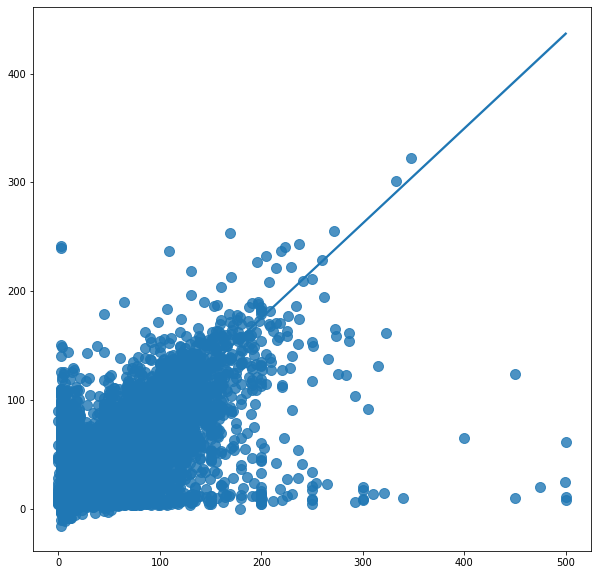

In [72]:
plt.figure(figsize=(10,10))
sns.regplot(y_test, pred_test_y_, fit_reg=True, scatter_kws={"s": 100})

## Testing the model with the test data

In [73]:
pred_lgbm = model.predict(kaggle_test, num_iteration = model.best_iteration)

In [74]:
print(pred_lgbm)

[ 9.43699253 10.22531626  4.43637107 ... 53.90822667 18.67605201
  7.2523666 ]


## Putting the results to the submission csv

In [75]:
submission = pd.read_csv('dataset/sample_submission.csv')
submission['fare_amount'] = pred_lgbm
submission.to_csv('submission_LGBM_with_FE.csv', index=False)


In [76]:
import xgboost
Regression_xgbooost=xgboost.XGBRegressor(objective='reg:squarederror', random_state=42,
                               n_estimators=2000, max_depth=10, learning_rate=0.05, 
                               subsample=1, colsample_bytree=0.8,tree_method='gpu_hist', gpu_id=0)
eval_set = [(X_test, y_test)]
Regression_xgbooost.fit(X_train,y_train,eval_metric="rmse", eval_set=eval_set, verbose=True)
pred_xgboost=Regression_xgbooost.predict(kaggle_test)



[0]	validation_0-rmse:13.86390
[1]	validation_0-rmse:13.25139
[2]	validation_0-rmse:12.65169
[3]	validation_0-rmse:12.08403
[4]	validation_0-rmse:11.55199
[5]	validation_0-rmse:11.04478
[6]	validation_0-rmse:10.58382
[7]	validation_0-rmse:10.13668
[8]	validation_0-rmse:9.73999
[9]	validation_0-rmse:9.33622
[10]	validation_0-rmse:8.95582
[11]	validation_0-rmse:8.61565
[12]	validation_0-rmse:8.27790
[13]	validation_0-rmse:7.97421
[14]	validation_0-rmse:7.67774
[15]	validation_0-rmse:7.41222
[16]	validation_0-rmse:7.14760
[17]	validation_0-rmse:6.89933
[18]	validation_0-rmse:6.66709
[19]	validation_0-rmse:6.45060
[20]	validation_0-rmse:6.24836
[21]	validation_0-rmse:6.05875
[22]	validation_0-rmse:5.88362
[23]	validation_0-rmse:5.71956
[24]	validation_0-rmse:5.56707
[25]	validation_0-rmse:5.42601
[26]	validation_0-rmse:5.29493
[27]	validation_0-rmse:5.17764
[28]	validation_0-rmse:5.07180
[29]	validation_0-rmse:4.96721
[30]	validation_0-rmse:4.87076
[31]	validation_0-rmse:4.77998
[32]	valid

<AxesSubplot:>

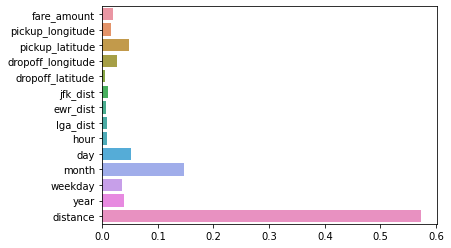

In [77]:
selected_predictors = [
    'fare_amount',
    'pickup_longitude', 
    'pickup_latitude', 
    'dropoff_longitude', 
    'dropoff_latitude',
    'jfk_dist',
    'ewr_dist',
    'lga_dist',
    'hour',
    'day',
    'month',
    'weekday',
    'year',
    'distance'
]
sns.barplot(y=list(data_train.loc[:, selected_predictors].columns), x=list(Regression_xgbooost.feature_importances_))

In [78]:
submission_random = pd.read_csv('dataset/sample_submission.csv')
submission['fare_amount'] = pred_xgboost
submission.to_csv('submission_xgboost_with_FE.csv', index=False)
submission

,key,fare_amount
0,2015-01-27 13:08:24.0000002,9.274911
1,2015-01-27 13:08:24.0000003,10.283590
2,2011-10-08 11:53:44.0000002,4.048957
3,2012-12-01 21:12:12.0000002,9.341863
4,2012-12-01 21:12:12.0000003,16.659243
...,...,...
9909,2015-05-10 12:37:51.0000002,9.295861
9910,2015-01-12 17:05:51.0000001,10.469940
9911,2015-04-19 20:44:15.0000001,53.975788
9912,2015-01-31 01:05:19.0000005,17.780605


In [79]:
import catboost as cb
train_dataset = cb.Pool(X_train, y_train) 
test_dataset = cb.Pool(X_test, y_test)

In [80]:
model = cb.CatBoostRegressor(loss_function='RMSE')

In [81]:
grid = {'iterations': [500],
        'learning_rate': [0.1],
        'depth': [10],
        'l2_leaf_reg': [0.2]}
model.grid_search(grid, train_dataset)

0:	learn: 13.5733158	test: 13.5885936	best: 13.5885936 (0)	total: 884ms	remaining: 7m 21s
1:	learn: 12.3742923	test: 12.3894488	best: 12.3894488 (1)	total: 1.66s	remaining: 6m 53s
2:	learn: 11.3081987	test: 11.3226965	best: 11.3226965 (2)	total: 2.43s	remaining: 6m 42s
3:	learn: 10.3607825	test: 10.3746305	best: 10.3746305 (3)	total: 3.19s	remaining: 6m 35s
4:	learn: 9.5229013	test: 9.5369224	best: 9.5369224 (4)	total: 3.93s	remaining: 6m 28s
5:	learn: 8.7822707	test: 8.7955438	best: 8.7955438 (5)	total: 4.68s	remaining: 6m 25s
6:	learn: 8.1303247	test: 8.1435559	best: 8.1435559 (6)	total: 5.42s	remaining: 6m 21s
7:	learn: 7.5588399	test: 7.5721112	best: 7.5721112 (7)	total: 6.17s	remaining: 6m 19s
8:	learn: 7.0600878	test: 7.0728668	best: 7.0728668 (8)	total: 6.98s	remaining: 6m 20s
9:	learn: 6.6248604	test: 6.6377229	best: 6.6377229 (9)	total: 7.74s	remaining: 6m 19s
10:	learn: 6.2456527	test: 6.2588410	best: 6.2588410 (10)	total: 8.51s	remaining: 6m 18s
11:	learn: 5.9194404	test: 5.

{'params': {'depth': 10,
  'iterations': 500,
  'learning_rate': 0.1,
  'l2_leaf_reg': 0.2},
 'cv_results': defaultdict(list,
             {'iterations': [0,
               1,
               2,
               3,
               4,
               5,
               6,
               7,
               8,
               9,
               10,
               11,
               12,
               13,
               14,
               15,
               16,
               17,
               18,
               19,
               20,
               21,
               22,
               23,
               24,
               25,
               26,
               27,
               28,
               29,
               30,
               31,
               32,
               33,
               34,
               35,
               36,
               37,
               38,
               39,
               40,
               41,
               42,
               43,
               44,
               

In [82]:
pred = model.predict(X_test)
rmse = (np.sqrt(mean_squared_error(y_test, pred)))
r2 = r2_score(y_test, pred)
print("Testing performance")
print('RMSE: {:.2f}'.format(rmse))
print('R2: {:.2f}'.format(r2))

Testing performance
RMSE: 3.63
R2: 0.86


In [83]:
pred_catboost= model.predict(kaggle_test)

In [85]:
pred_catboost

array([10.55237623, 10.81767616,  4.54340906, ..., 54.1261411 ,
       18.59976097,  7.15071045])

In [86]:
submission = pd.read_csv('dataset/sample_submission.csv')
submission['fare_amount'] = pred_catboost
submission.to_csv('submission_catBoost_with_FE.csv', index=False)

In [87]:
pred_lgbm

array([ 9.43699253, 10.22531626,  4.43637107, ..., 53.90822667,
       18.67605201,  7.2523666 ])

In [88]:
pred_catboost

array([10.55237623, 10.81767616,  4.54340906, ..., 54.1261411 ,
       18.59976097,  7.15071045])

In [89]:
pred_xgboost

array([ 9.274911 , 10.28359  ,  4.0489573, ..., 53.97579  , 17.780605 ,
        7.0368824], dtype=float32)

In [91]:
mean_avg_ensembled_prediction = (pred_catboost+pred_xgboost+pred_lgbm)/3
mean_avg_ensembled_prediction 

array([ 9.75475989, 10.44219424,  4.34291249, ..., 54.00338529,
       18.35213943,  7.14665315])

In [92]:
submission = pd.read_csv('dataset/sample_submission.csv')
submission['fare_amount'] = mean_avg_ensembled_prediction
submission.to_csv('submission_mean_avg_ensemble.csv', index=False)

In [98]:
weighted_avg_ensembled_prediction = (0.3*pred_catboost)+(0.3*pred_xgboost)+(0.4*(pred_lgbm))
weighted_avg_ensembled_prediction

array([ 9.53232277, 10.29037968,  4.40833352, ..., 53.93677416,
       18.57887826,  7.22065259])

In [99]:
submission = pd.read_csv('dataset/sample_submission.csv')
submission['fare_amount'] = weighted_avg_ensembled_prediction
submission.to_csv('submission_weighted_avg_ensemble_3.csv', index=False)